 # Here is my project
 
 Here is some information about my project

In [29]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_json('/Users/Karolina/ProjectsDataScience/data_science_environment/data/MyDataSpotify/StreamingHistory4.json')

In [11]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-10-02 20:31,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629
1,2021-10-03 07:33,Mr.Kitty,After Dark,116403
2,2021-10-03 07:33,Khalid,Better,1493
3,2021-10-03 07:37,Khalid,Better,228583
4,2021-10-03 07:41,Khalid,Better,229275


In [18]:
df.artistName.value_counts()
df.shape

(7735, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     7735 non-null   datetime64[ns]
 1   artistName  7735 non-null   object        
 2   trackName   7735 non-null   object        
 3   msPlayed    7735 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 241.8+ KB


In [21]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

In [27]:
df['endTimeHour'] = df.endTime.dt.hour
df['endTimeDate'] = df.endTime.dt.date

In [81]:
df.head(30)

,endTime,artistName,trackName,msPlayed,endTimeHour,endTimeDate
0,2021-10-02 20:31:00,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629,20,2021-10-02
1,2021-10-03 07:33:00,Mr.Kitty,After Dark,116403,7,2021-10-03
2,2021-10-03 07:33:00,Khalid,Better,1493,7,2021-10-03
3,2021-10-03 07:37:00,Khalid,Better,228583,7,2021-10-03
4,2021-10-03 07:41:00,Khalid,Better,229275,7,2021-10-03
5,2021-10-03 07:44:00,Khalid,Better,194119,7,2021-10-03
6,2021-10-03 07:48:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
7,2021-10-03 07:51:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
8,2021-10-03 07:55:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
9,2021-10-03 08:22:00,CKay,love nwantiti (ah ah ah),2560,8,2021-10-03


In [30]:
%matplotlib inline

In [62]:
# Prepare data
x_var = 'endTimeDate'
groupby_var = 'endTimeHour'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
labels = np.unique(df[groupby_var]).tolist()

In [41]:
df_agg.describe()

endTimeDate                        
                  count unique         top freq
endTimeHour                                    
0                     1      1  2021-11-12    1
3                    13      2  2021-10-05   10
4                    73      5  2021-10-05   25
5                   280     14  2021-10-13   60
6                   576     31  2021-10-04   90
7                   741     45  2021-10-16   58
8                   562     47  2021-10-23   39
9                   532     43  2021-11-01   45
10                  383     36  2021-10-23   39
11                  354     38  2021-10-05   28
12                  461     35  2021-11-08   65
13                  501     37  2021-11-14   49
14                  373     32  2021-11-07   52
15                  628     40  2021-11-07   86
16                  517     36  2021-11-08   40
17                  321     35  2021-11-07   37
18                  425     37  2021-10-24   60
19                  355     35  2021-10-15   36
20                  300     31  2021-10-30   34
21                  189     23  2021-10-07   21
22                  119     17  2021-10-30   26
23                   31      3  2021-11-14   19

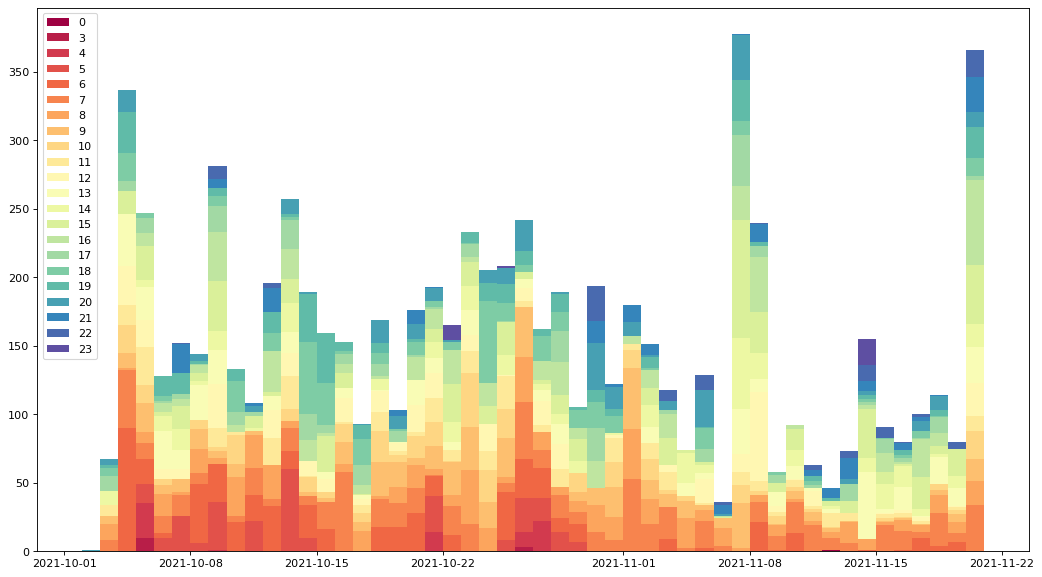

In [79]:
#Plot
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
plt.hist(vals, df[x_var].unique(), stacked=True, density=False, color=colors)
# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")

plt.show()

This doesn't make much sense as it would indicate that I do listen to a lot of music during he night between midnight and 6/7 am. Assumption after reading data documentation is that the timestimes might be in Pacific Standard Time that is used in state of California. Let's change it to the European timezone and rerun the graph

In [83]:
from datetime import datetime
from pytz import timezone

In [119]:
#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df['endTimeHourEU'] = df.endTimeTzEU.dt.hour
df['endTimeDateEU'] = df.endTimeTzEU.dt.date

In [121]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeHour,endTimeDate,endTimeTz,endTimeTzEU,endTimeHourEU,endTimeDateEU
0,2021-10-02 20:31:00,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629,20,2021-10-02,2021-10-02 20:31:00+00:00,2021-10-02 22:31:00+02:00,22,2021-10-02
1,2021-10-03 07:33:00,Mr.Kitty,After Dark,116403,7,2021-10-03,2021-10-03 07:33:00+00:00,2021-10-03 09:33:00+02:00,9,2021-10-03
2,2021-10-03 07:33:00,Khalid,Better,1493,7,2021-10-03,2021-10-03 07:33:00+00:00,2021-10-03 09:33:00+02:00,9,2021-10-03
3,2021-10-03 07:37:00,Khalid,Better,228583,7,2021-10-03,2021-10-03 07:37:00+00:00,2021-10-03 09:37:00+02:00,9,2021-10-03
4,2021-10-03 07:41:00,Khalid,Better,229275,7,2021-10-03,2021-10-03 07:41:00+00:00,2021-10-03 09:41:00+02:00,9,2021-10-03


In [122]:
# Prepare data
x_var = 'endTimeDateEU'
groupby_var = 'endTimeHourEU'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
labels = np.unique(df[groupby_var]).tolist()

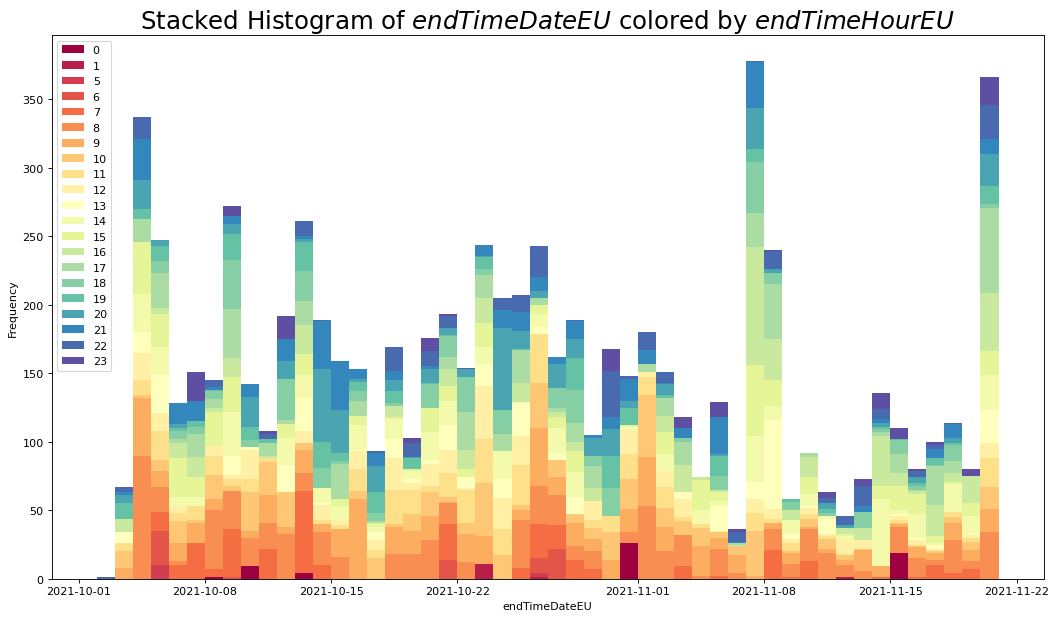

In [123]:
#Plot
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
plt.hist(vals, df[x_var].unique(), stacked=True, density=False, color=colors)
# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")

plt.show()

In [126]:
freq = df.loc[:, [x_var, groupby_var]].groupby(groupby_var).count()

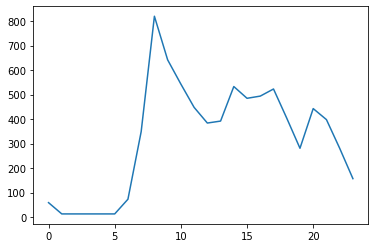

In [127]:
plt.plot(freq)
plt.show()